# Importing necessary libraries

In [369]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Loading the dataset

In [370]:
df = pd.read_csv('data.csv')

### Understand the Data Structure

In [371]:
df.shape

(16857, 29)

In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16857 non-null  object 
 1   equipment_energy_consumption  16013 non-null  object 
 2   lighting_energy               16048 non-null  object 
 3   zone1_temperature             15990 non-null  object 
 4   zone1_humidity                16056 non-null  object 
 5   zone2_temperature             16004 non-null  object 
 6   zone2_humidity                15990 non-null  float64
 7   zone3_temperature             16055 non-null  float64
 8   zone3_humidity                15979 non-null  float64
 9   zone4_temperature             16041 non-null  float64
 10  zone4_humidity                16076 non-null  float64
 11  zone5_temperature             16019 non-null  float64
 12  zone5_humidity                16056 non-null  float64
 13  z

In [373]:
df.describe()

,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,zone5_humidity,zone6_temperature,zone6_humidity,zone7_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
count,15990.000000,16055.000000,15979.000000,16041.000000,16076.000000,16019.000000,16056.000000,16009.000000,16010.000000,16063.000000,...,16084.000000,15969.000000,16051.000000,16015.000000,16058.000000,16029.000000,16042.000000,16031.000000,16031.000000,16033.000000
mean,39.494553,21.665733,38.201314,20.239922,37.945608,19.052613,50.289131,6.469934,59.162913,19.672472,...,18.851085,40.318199,6.218582,755.757602,78.977595,4.195988,38.457150,2.783507,24.854981,25.093780
std,10.129513,2.594309,10.144388,2.783050,10.769813,2.346158,18.722516,8.867993,52.657787,2.879815,...,2.528783,11.168678,7.554684,13.643585,28.565660,4.409729,21.318655,6.094732,26.214960,25.523631
min,-77.265503,6.543921,-71.406273,4.613485,-81.446225,5.921094,-141.640143,-42.987365,-353.393026,3.578021,...,4.476511,-81.582494,-37.524768,678.159940,-221.668765,-20.929527,-82.329792,-32.098095,-120.170177,-120.409590
25%,37.757500,20.533333,36.592500,19.266667,35.200000,18.061111,45.290000,2.930000,37.066667,18.500000,...,17.890000,38.230000,3.000000,750.800000,71.000000,2.000000,29.000000,0.450000,12.179924,12.193789
50%,40.293333,21.767500,38.400000,20.290000,38.090000,19.050000,48.854429,6.263333,62.766667,19.600000,...,18.890000,40.363333,6.000000,756.200000,84.166667,4.000000,40.000000,2.750000,24.866978,24.834261
75%,43.000000,22.760000,41.433333,21.356667,41.560833,20.100000,53.918333,9.690000,86.590000,21.000000,...,20.200000,43.790000,9.250000,762.100000,91.988095,6.000000,40.000000,5.308333,37.950236,37.971764
max,77.265503,36.823982,71.406273,35.921144,81.446225,32.157594,141.640143,55.932271,353.393026,35.712952,...,33.238012,81.582494,49.853906,833.392675,221.668765,29.318719,159.606156,37.673716,170.156325,170.329617


# Steps to follow

* Cleaning the dataset
  - Remove duplicates
  - Identify outliers
  - Check and impute null values
  - Remove outliers
* Perform Feature Engineering
    - Heatmap
    - RFE
    - chisquare test for random_variable 1 and 2
    - Multicollinearity Check: Use VIF (Variance Inflation Factor)
    - Datetime Decomposition: Extract hour, weekday, month, etc.
    - Scale/normalize if needed

Drop Duplicates

In [374]:
df.duplicated().sum()

np.int64(68)

In [375]:
df = df.drop_duplicates()
df.shape

(16789, 29)

Check for missing values

In [376]:
df.isnull().sum().sort_values(ascending=False)

,0
zone9_humidity,886
zone3_humidity,877
zone2_humidity,863
zone1_temperature,862
zone2_temperature,848
zone8_temperature,843
zone6_temperature,842
zone6_humidity,841
atmospheric_pressure,841
equipment_energy_consumption,841


Plan for imputation:

First check uniue values in object colums to filter then proceed with below steps.

- Drop rows where equipment_energy_consumption is missing
- Interpolate Time-Based Features
- Zone-Wise Sensor Data (Temperature & Humidity)

In [377]:
non_numeric_cols = df.select_dtypes(include='object').columns
print("Object-type columns:", non_numeric_cols.tolist())

Object-type columns: ['timestamp', 'equipment_energy_consumption', 'lighting_energy', 'zone1_temperature', 'zone1_humidity', 'zone2_temperature']


In [378]:
df['equipment_energy_consumption'].unique()

array(['60.0', '50.0', nan, '70.0', '230.0', '580.0', '430.0', '250.0',
       '100.0', '90.0', '80.0', '140.0', '120.0', '190.0', '110.0',
       '400.0', '390.0', '240.0', '40.0', '30.0', '310.0', '380.0',
       '370.0', '20.0', '-110.0', '260.0', '500.0', '450.0', '220.0',
       '170.0', '290.0', '130.0', '200.0', '210.0', '-50.0', '-20.0',
       '-944.5664110012307', '350.0', '300.0', '-400.0', '340.0', '150.0',
       '330.0', '420.0', '520.0', '360.0', '-270.0', '-30.0', '180.0',
       '550.0', '690.0', '620.0', '610.0', '490.0', '410.0', '320.0',
       '270.0', '740.0', '910.0', '510.0', '790.0', '1139.9856929495108',
       '-40.0', 'error', '460.0', '160.0', '480.0', '280.0', '-220.0',
       '560.0', '1080.0', '750.0', '???', '470.0', '440.0', '-80.0',
       '800.0', '-790.0', '540.0', '530.0', 'check', '660.0', '630.0',
       '600.0', '10.0', '570.0', '830.0', '1070.0', '890.0', '590.0',
       '-1139.9856929495108', '850.0', '710.0', '680.0', '-120.0',
       '-310.0

In [379]:
df['lighting_energy'].unique()

array(['-77.78778596503064', '30.0', '40.0', '50.0', '70.0', '60.0',
       '10.0', '20.0', nan, '-20.0', '0.0', '86.00296632575207', '???',
       '-0.0', 'error', '-10.0', '-40.0', 'check', '-30.0',
       '-86.00296632575207', 'unknown'], dtype=object)

In [380]:
df['zone1_temperature'].unique()

array(['33.74660933896648', '19.89', '19.8566666666667', '19.79',
       '19.9266666666667', '20.066666666666695', '20.1333333333333',
       '20.26', '20.4266666666667', '20.566666666666695', '20.73',
       '20.8566666666667', '20.89', '20.963333333333296',
       '21.033333333333296', '21.1', '21.1333333333333', '21.2', '21.29',
       '21.3566666666667', '21.39', '21.5', '21.533333333333296', '21.6',
       nan, '21.26', '21.1666666666667', '21.075', '21.0',
       '20.9266666666667', '20.79', '20.7', '20.6', '20.5', '20.39',
       '20.29', '20.23', '20.2', '20.1666666666667', '20.1',
       '20.033333333333296', '20.0', 'unknown', '19.823333333333295',
       '19.76', '19.7', '19.73', '19.963333333333296', '19.6333333333333',
       '19.6666666666667', '19.6', '19.533333333333296', '19.5',
       '19.4266666666667', '19.39', '19.323333333333295', '19.29', '19.2',
       '19.1', '19.033333333333296', '19.0', '18.963333333333296',
       '18.89', '18.865', '18.79', '18.856666666666

In [381]:
df['zone1_humidity'].unique()

array(['47.59666666666671', '46.69333333333329', '46.3', ...,
       '37.26333333333329', '38.323333333333295', '38.33'], dtype=object)

In [382]:
df['zone2_temperature'].unique()

array(['19.2', '19.23', '19.3566666666667', '19.4266666666667',
       '19.566666666666695', '19.73', '19.8566666666667',
       '20.033333333333296', '20.1666666666667', '20.2', nan, '20.26',
       '20.29', '20.3566666666667', '20.4266666666667', '20.5',
       '20.533333333333296', '20.6666666666667', '???', '20.7', '20.79',
       '20.89', '20.963333333333296', '21.0', '20.9266666666667',
       '20.6333333333333', '20.6', '20.39', '20.1', '20.0', '19.89',
       '19.823333333333295', '19.79', '19.76', '19.7', '19.6333333333333',
       '19.6', '19.5', '19.39', '19.29', '19.218', '19.175', '19.1',
       '19.066666666666695', '19.0222222222222', '19.033333333333296',
       '19.0', '18.963333333333296', '18.89', '18.9266666666667', '19.15',
       '19.1363636363636', '19.13', '19.0375', '19.007692307692295',
       '18.99', '18.9022222222222', '18.8566666666667', '19.245', '19.37',
       '19.0444444444444', '18.910625', '18.8081818181818', '18.79',
       '18.775', '18.7', '18.690

### Convert these columns to numeric

In [383]:
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')

<ipython-input-383-6b1e6b0a678c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')


In [384]:
for col in non_numeric_cols.tolist()[1:]:
  df[col] = pd.to_numeric(df[col], errors='coerce')

In [385]:
df = df.dropna(subset=["equipment_energy_consumption"])

In [386]:
df = df[df['equipment_energy_consumption'] > 0]

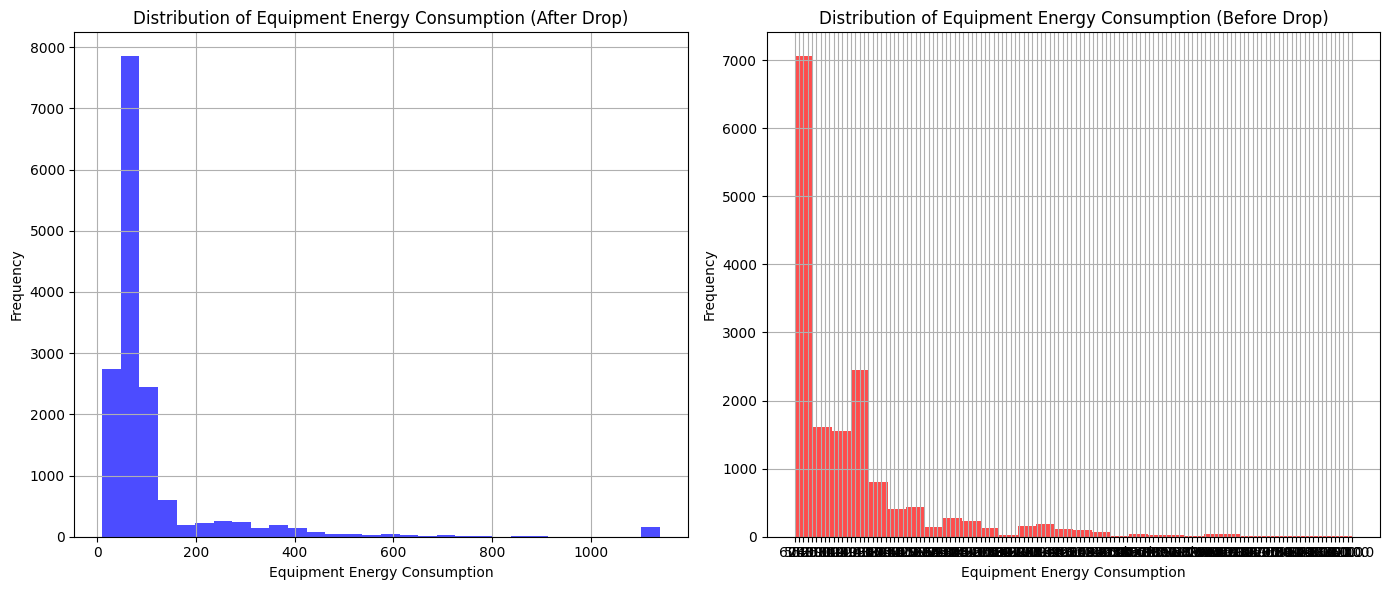

In [387]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
df['equipment_energy_consumption'].hist(bins=30, alpha=0.7, color='blue', label='After Dropping')
plt.title('Distribution of Equipment Energy Consumption (After Drop)')
plt.xlabel('Equipment Energy Consumption')
plt.ylabel('Frequency')


df_original = pd.read_csv('data.csv')

plt.subplot(1, 2, 2)
df_original['equipment_energy_consumption'].hist(bins=30, alpha=0.7, color='red', label='Before Drop')
plt.title('Distribution of Equipment Energy Consumption (Before Drop)')
plt.xlabel('Equipment Energy Consumption')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [388]:
df.shape

(15567, 29)

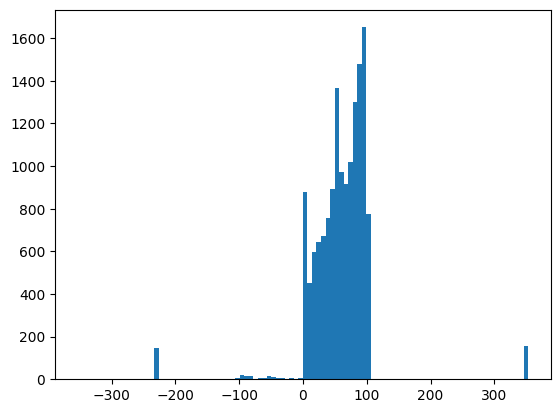

In [389]:
plt.hist(df['zone6_humidity'], bins=100);

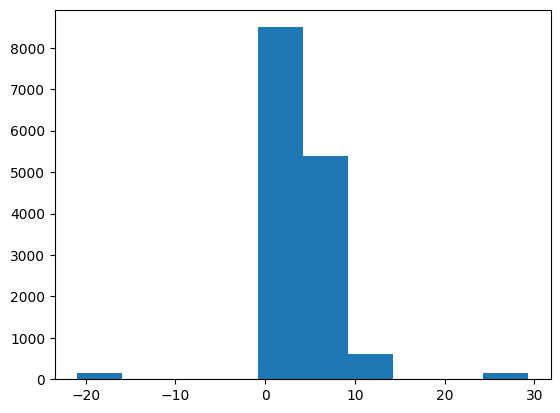

In [390]:
plt.hist(df['wind_speed']);

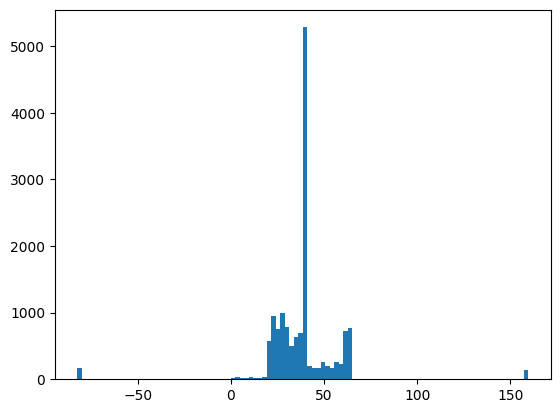

In [391]:
plt.hist(df['visibility_index'], bins=100);

In [392]:
humidity_cols = [col for col in df.columns if 'humidity' in col]
for col in humidity_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df.loc[df[col] < 0, col] = np.nan

df.loc[df['lighting_energy']<0, 'lighting_energy'] = np.nan
df.loc[df['wind_speed']<0, 'wind_speed'] = np.nan
df.loc[df['visibility_index']<0, 'visibility_index'] = np.nan

In [393]:
df.shape

(15567, 29)

In [181]:
df.set_index('timestamp', inplace=True)

In [182]:
features_to_interpolate = [
    'outdoor_temperature', 'outdoor_humidity', 'dew_point',
    'wind_speed', 'atmospheric_pressure', 'visibility_index',
    'lighting_energy'
]

df = df.sort_values('timestamp')
df[features_to_interpolate] = df[features_to_interpolate].interpolate(method='time')


In [183]:
# zone_columns = [col for col in df.columns if 'zone' in col]
# imputer = SimpleImputer(strategy='median')
# df[zone_columns] = imputer.fit_transform(df[zone_columns])\

# Got error